# 회귀분석: Used Car Price Prediction

* EDA, 전처리, 파생변수 생성
* 회귀분석의 기본가정 검토
* 변수 제거, 선택
* 다중공선성 확인, 처리
* 모델 평가

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [33]:
pd.set_option('display.max_rows', 500)

## Data

In [34]:
data = pd.read_csv('C:/Users/jhr50/tobigs/week2/week2_Regression/assignment2_train-data.csv', index_col=0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [35]:
data.shape

(6019, 13)

### 1. Data Description

In [36]:
# 결측치 체크
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

결측치 처리 과정이 필요한 것으로 보입니다.

In [37]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


- `Mileage`, `Engine`, `Power` 변수의 경우 단위 제거 후 연속형 변수로 사용
- `New_Price`는 결측치가 5000개 이상이므로 변수 삭제
- `Fual_Type`, `Transmission`, `Owner_Type` 변수의 경우 더미화를 통해 범주형 변수로 사용

### 2. Price distribution

목표변수인 Price의 분포를 확인합니다.

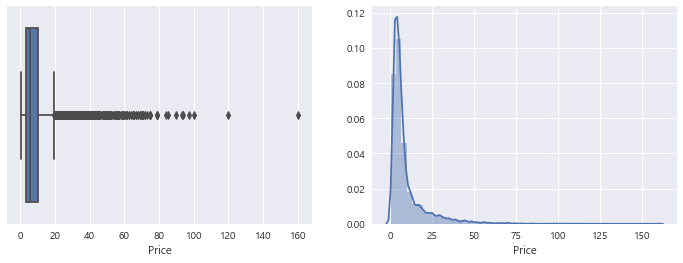

In [39]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(12,4)

sns.boxplot(data['Price'], ax=ax[0])
sns.distplot(data['Price'], ax=ax[1])

- boxplot의 경우 이상치로 보이는 것이 존재하여 해당 데이터를 확인하였습니다. 
- distplot의 경우 왼쪽에 치우쳐진 분포를 보여 log transformation 적용하였습니다.

In [40]:
# Price 이상치 확인
data[data['Price']>100]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,2.3 Cr,160.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.0


자동차 브랜드가 랜드로버, 람보르기니인 것을 보면 값이 잘못 기입된 것 같진 않습니다. 

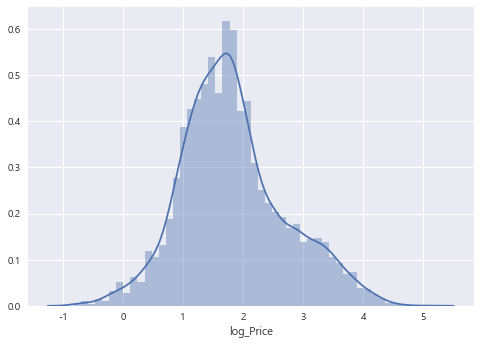

In [41]:
# log transformation 
data['log_Price']=np.log(data['Price'])

sns.distplot(data['log_Price'])

log transformation 적용 후 정규분포의 양상을 보였습니다. 

In [42]:
data = data.drop('Price', axis=1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,log_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,2.875822


해당 데이터를 가지고 결측치 처리 과정을 수행합니다. 

## Data Preprocessing

1. 결측치가 있는 행과 열을 확인한 후 제거합니다. 
2. 연속형 변수로 사용가능한 변수들은 단위를 제거해줍니다.
3. 범주형 변수의 경우 더미변수로 만들어줍니다.
4. 설명변수들 간의 관계를 확인한 후 다중공선성을 제거합니다. 
5. 목표변수와 설명변수들 간의 상관관계를 확인합니다. 

### 1. Missing Value

In [43]:
# Mileage 결측치 확인 및 제거
data[data['Mileage'].isnull()]

data = data.drop(data[data['Mileage'].isnull()].index)
data.shape # 6019 -> 6017 : 2개의 행 삭제

(6017, 13)

In [44]:
# Engine 결측치 확인 및 제거
data[data['Engine'].isnull()]

data = data.drop(data[data['Engine'].isnull()].index)
data.shape # 6017 -> 5981 : 36개의 행 삭제

(5981, 13)

In [45]:
# Seats 결측치 확인 및 제거
data[data['Seats'].isnull()]

data = data.drop(data[data['Seats'].isnull()].index)
data.shape # 5981 -> 5975 : 6개의 행 삭제

(5975, 13)

In [46]:
# New_Price 열 삭제
data = data.drop('New_Price', axis=1)
data.shape

(5975, 12)

In [47]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.875822


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5975 non-null object
Location             5975 non-null object
Year                 5975 non-null int64
Kilometers_Driven    5975 non-null int64
Fuel_Type            5975 non-null object
Transmission         5975 non-null object
Owner_Type           5975 non-null object
Mileage              5975 non-null object
Engine               5975 non-null object
Power                5975 non-null object
Seats                5975 non-null float64
log_Price            5975 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


### 2. 단위 제거 -> 연속형 변수

 `Mileage`, `Engine`, `Power` 변수의 단위를 제거해줍니다 

In [49]:
data.shape

(5975, 12)

#### 1) Mileage 변수

- Mileage의 경우 'km/kg'과 'kmpl' 단위로 구성되어 있습니다. 
- 'km/kg' 단위의 경우 수소차(CNG)에 해당되는데, kmpl로 단위 변환이 어려우므로 'km/kg' 단위를 갖는 66개의 데이터는 삭제합니다.
- kmpl 단위를 제거하고 연속형 변수로 변환해줍니다. 

In [50]:
# Mileage의 경우 단위가 2가지 : km/kg, kmpl 
data[data['Mileage'].str.contains('km/kg')] # 66개
data[data['Mileage'].str.contains('kmpl')] # 5909개

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.875822
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,1.252763
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,1.558145
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,1.386294
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,1.064711
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,0.974560


In [51]:
# km/kg 단위 데이터 삭제
km_kg = data[data['Mileage'].str.contains('km/kg')]
km_kg.index

data = data.drop(km_kg.index)
data.shape # 5975 -> 5909 : 66개 데이터 삭제

(5909, 12)

In [52]:
# Mileage 변수에서 'kmpl' 제거 후 연속형 변수로 만들기 
data['Mileage'] = data['Mileage'].str.replace('kmpl','')
data['Mileage'] = pd.to_numeric(data['Mileage'])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,2.875822
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.0,1.252763


#### 2) Engine 변수

- Engine의 경우 CC 단위만으로 구성되어있으므로 CC 단위를 제거한 후 연속형 변수로 변환해줍니다.

In [53]:
# Engine 변수에서 CC 단위만을 갖는지 확인
data['Engine'].str.contains('CC').sum() # 5909개

# 'CC' 제거 후 연속형 변수로 만들기
data['Engine'] = data['Engine'].str.replace('CC', '')
data['Engine'] = pd.to_numeric(data['Engine'])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,2.875822
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1 bhp,5.0,1.252763


#### 3) Power 변수

- Power의 경우 bhp 단위만으로 구성되어있으며 이를 제거하고 연속형 변수로 변환해줍니다.
- 이 때, Power 변수 값으로 null이 존재하여 해당 데이터를 삭제합니다. 

In [54]:
# Power 변수에서 bhp 단위만을 갖는지 확인
data['Power'].str.contains('bhp').sum() # 5909

# 'bhp' 제거 후 연속형 변수로 만들기
data['Power'] = data['Power'].str.replace('bhp', '')

# string 'null' 을 가진 데이터 존재
data[data['Power'].str.contains('null')].shape # 102개 

# null 데이터 삭제
str_null = data[data['Power'].str.contains('null')]
str_null.index
data = data.drop(str_null.index)

# 숫자형으로 변환
data['Power'] = pd.to_numeric(data['Power']) 
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,2.875822
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,1.252763


In [55]:
data.shape # 5909 -> 5807 : 102개 데이터 삭제

(5807, 12)

##### 회귀분석 기본 가정 검토 : 선형성

설명변수와 반응변수가 선형 관계에 있는지 확인합니다.

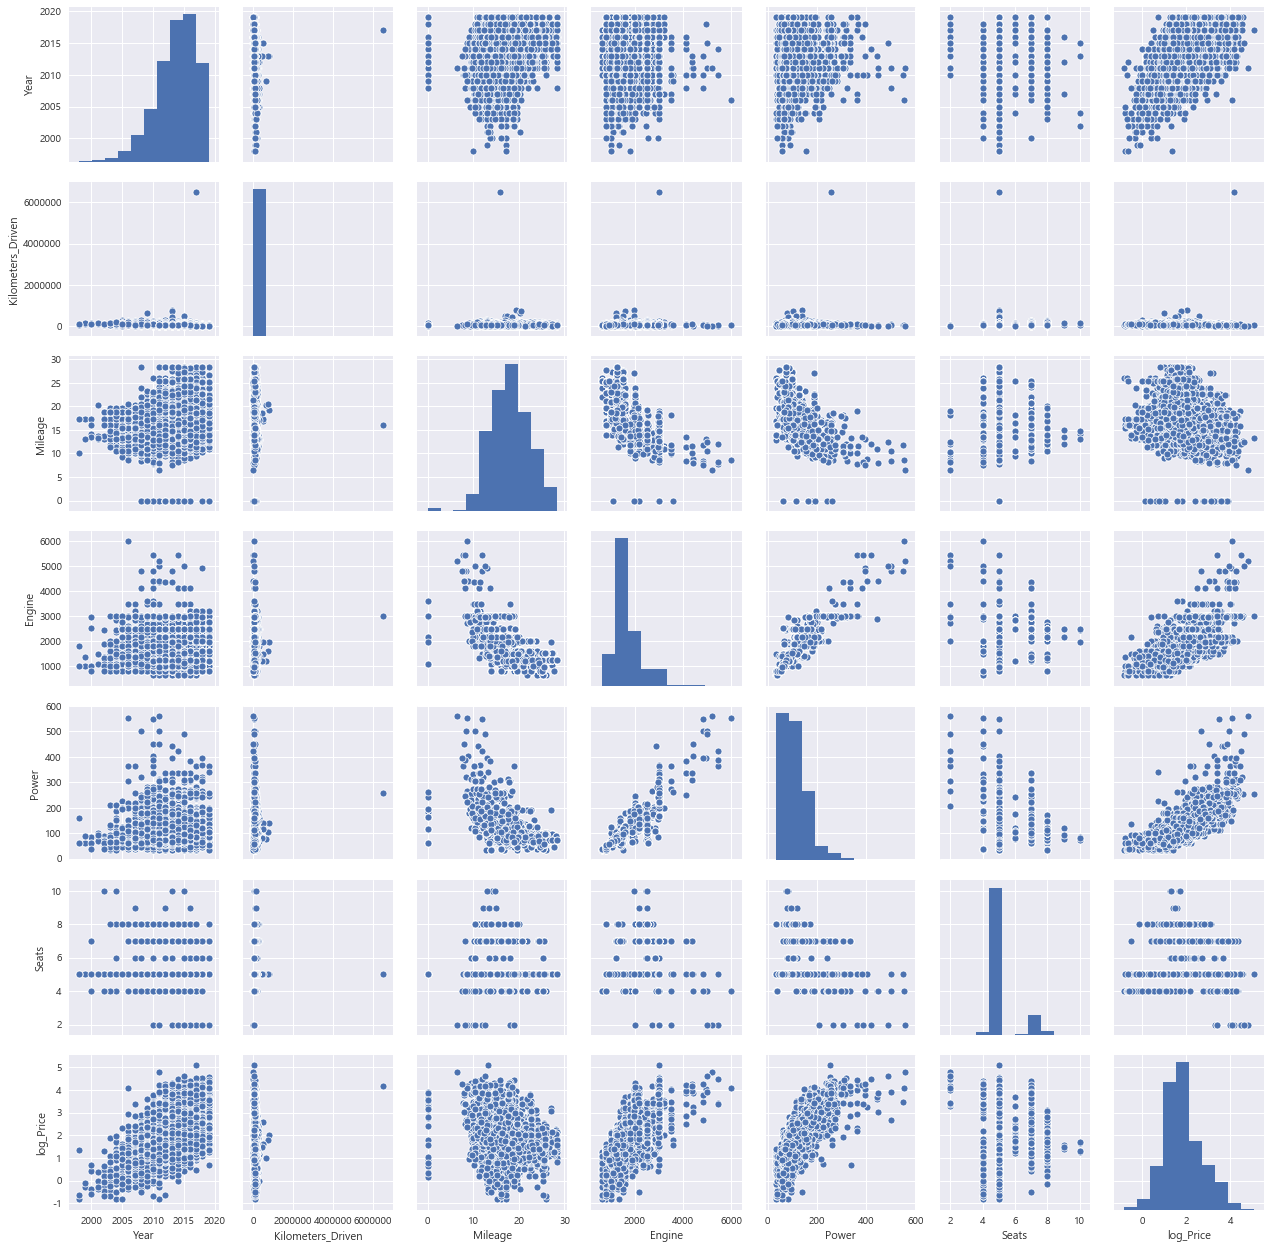

In [56]:
sns.pairplot(data)

- `Kilometers_Driven`의 경우 극단적인 값으로 인해 선형성이 보이지 않으므로 이상치를 확인한 후 선형성을 재검토합니다. 
- `Mileage`의 경우 선형성을 보이나 0의 값을 가지는 데이터가 보이므로 이를 제거합니다. 
- `Seats`의 경우는 조금 애매하지만 음의 상관성을 가진 것으로 보입니다.  

#### 1) Kilometers_Driven 이상치 확인

6백만km 이상인 경우 다른 자동차에 비해 지나치게 큰 값이므로 이상치라 판정하여 제거하였습니다. 

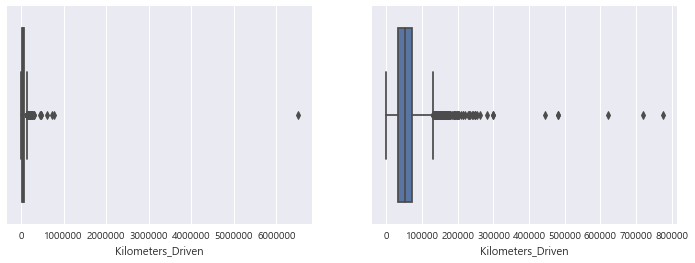

In [57]:
# Kilometers_Driven 이상치 확인
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(12,4)

sns.boxplot(data['Kilometers_Driven'], ax=ax[0])

data[data['Kilometers_Driven']>6000000] 

# 이상치 제거
data = data.drop(2328)
data.shape # 5806

sns.boxplot(data['Kilometers_Driven'], ax=ax[1])

#### 2) Mileage 

In [58]:
# Mileage가 0인 데이터
data[data['Mileage']==0].shape # 28개

# 연비가 0일 수 없으므로 제거
mileage_0 = data[data['Mileage']==0]
data = data.drop(mileage_0.index)

data.shape # 5806 -> 5778 

(5778, 12)

##### 선형성 재확인

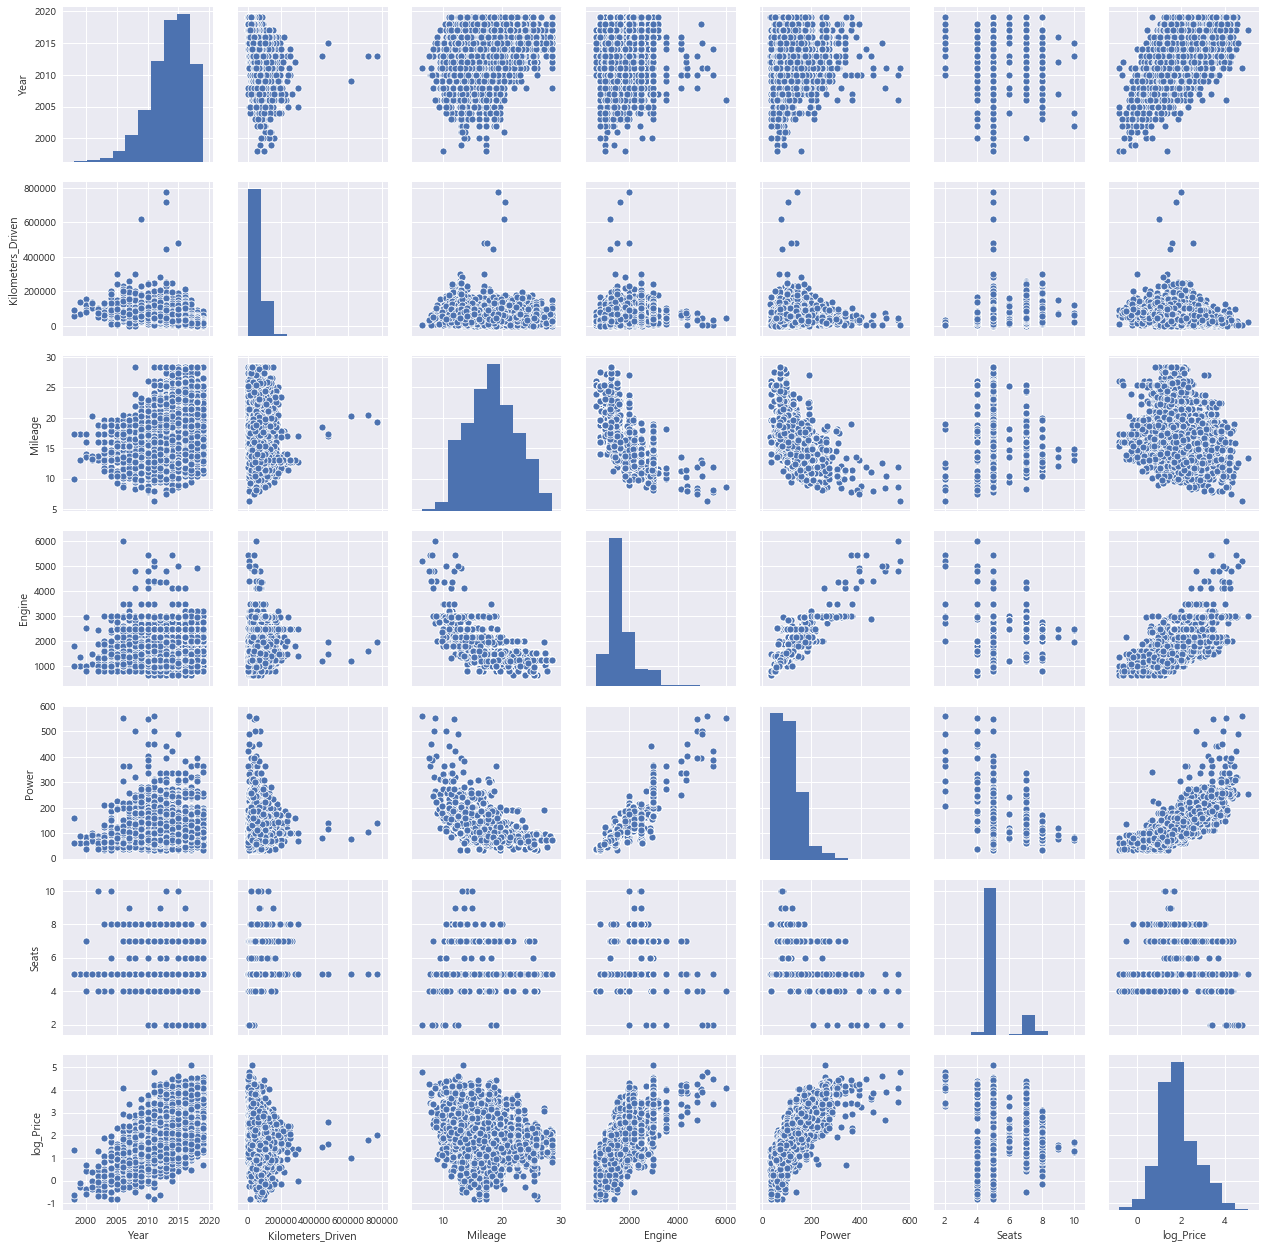

In [59]:
sns.pairplot(data)

- `Kilometers_Driven`의 경우 왼쪽으로 치우쳐져 있어 선형성이 확인되지 않으므로 log transformation을 적용해줍니다. 

In [60]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])
data = data.drop('Kilometers_Driven', axis=1)
data.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price,log_Kilometers_Driven
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582,126.20,5.0,2.525729,10.621327
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199,88.70,5.0,1.504077,10.736397
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248,88.76,7.0,1.791759,11.373663
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968,140.80,5.0,2.875822,10.613246
6,Nissan Micra Diesel XV,Jaipur,2013,Diesel,Manual,First,23.08,1461,63.10,5.0,1.252763,11.373652


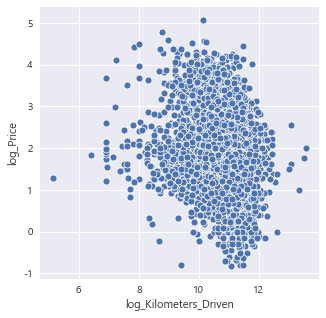

In [61]:
plt.figure(figsize=(5,5))
sns.scatterplot(data['log_Kilometers_Driven'], 'log_Price', data= data)

In [62]:
# data 열 순서 변경
data.columns
data = data[['Name', 'Location', 'Year','log_Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'log_Price']]
data.head()

,Name,Location,Year,log_Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582,126.20,5.0,2.525729
2,Honda Jazz V,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199,88.70,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248,88.76,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968,140.80,5.0,2.875822
6,Nissan Micra Diesel XV,Jaipur,2013,11.373652,Diesel,Manual,First,23.08,1461,63.10,5.0,1.252763


### 3. Categorical Variable

`Fual_Type`, `Transmission`, `Owner_Type` 변수의 경우 더미변수로 변환해줍니다. 

#### 1) Fuel_Type

In [63]:
# Fuel_Type 더미화
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [64]:
dummy1 = pd.get_dummies(data.Fuel_Type)
dummy1.head()

,Diesel,Petrol
1,1,0
2,0,1
3,1,0
4,1,0
6,1,0


In [65]:
data = pd.concat([data, dummy1], axis=1)
data = data.drop('Fuel_Type', axis=1)
data.head()

,Name,Location,Year,log_Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price,Diesel,Petrol
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621327,Manual,First,19.67,1582,126.20,5.0,2.525729,1,0
2,Honda Jazz V,Chennai,2011,10.736397,Manual,First,18.20,1199,88.70,5.0,1.504077,0,1
3,Maruti Ertiga VDI,Chennai,2012,11.373663,Manual,First,20.77,1248,88.76,7.0,1.791759,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613246,Automatic,Second,15.20,1968,140.80,5.0,2.875822,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,11.373652,Manual,First,23.08,1461,63.10,5.0,1.252763,1,0


#### 2) Transmission & Owner_Type

In [66]:
# Transmission 더미화
dummy2 = pd.get_dummies(data['Transmission'])
dummy2

# Owner_Type 더미화
dummy3 = pd.get_dummies(data['Owner_Type'])
dummy3

data = pd.concat([data, dummy2, dummy3], axis=1)
data = data.drop(['Transmission', 'Owner_Type'], axis=1)
data.head()

,Name,Location,Year,log_Kilometers_Driven,Mileage,Engine,Power,Seats,log_Price,Diesel,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621327,19.67,1582,126.20,5.0,2.525729,1,0,0,1,1,0,0,0
2,Honda Jazz V,Chennai,2011,10.736397,18.20,1199,88.70,5.0,1.504077,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,11.373663,20.77,1248,88.76,7.0,1.791759,1,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613246,15.20,1968,140.80,5.0,2.875822,1,0,1,0,0,0,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,11.373652,23.08,1461,63.10,5.0,1.252763,1,0,0,1,1,0,0,0


In [67]:
# data 열 순서 변경
data.columns

data = data[['Name', 'Location', 'Year', 'log_Kilometers_Driven', 'Diesel', 'Petrol',  'Automatic', 'Manual', 
              'First', 'Fourth & Above', 'Second', 'Third',
             'Mileage','Engine', 'Power', 'Seats', 'log_Price']]

# data 열 이름 변경
data.columns = ['Name', 'Location', 'Year', 'log_Kilometers_Driven', 'Diesel', 'Petrol',  'Automatic', 'Manual', 
              'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third',
             'Mileage','Engine', 'Power', 'Seats', 'log_Price']

data.head()


,Name,Location,Year,log_Kilometers_Driven,Diesel,Petrol,Automatic,Manual,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Mileage,Engine,Power,Seats,log_Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621327,1,0,0,1,1,0,0,0,19.67,1582,126.20,5.0,2.525729
2,Honda Jazz V,Chennai,2011,10.736397,0,1,0,1,1,0,0,0,18.20,1199,88.70,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,11.373663,1,0,0,1,1,0,0,0,20.77,1248,88.76,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613246,1,0,1,0,0,0,1,0,15.20,1968,140.80,5.0,2.875822
6,Nissan Micra Diesel XV,Jaipur,2013,11.373652,1,0,0,1,1,0,0,0,23.08,1461,63.10,5.0,1.252763


### 4. 변수들 간의 상관관계

변수들간의 상관관계를 확인한 후 다중공선성을 확인 및 처리합니다. 

In [68]:
X = data.drop('log_Price', axis=1)
y = data['log_Price']

In [69]:
# correlation matrix
X.corr()

,Year,log_Kilometers_Driven,Diesel,Petrol,Automatic,Manual,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Mileage,Engine,Power,Seats
Year,1.000000,-0.500546,0.109467,-0.109467,0.084903,-0.084903,0.365527,-0.063342,-0.295184,-0.225147,0.300946,-0.070128,0.012787,0.007545
log_Kilometers_Driven,-0.500546,1.000000,0.263872,-0.263872,-0.100134,0.100134,-0.210397,0.038824,0.180611,0.099270,-0.137883,0.159565,0.017749,0.196823
Diesel,0.109467,0.263872,1.000000,-1.000000,0.129322,-0.129322,0.036365,0.002041,-0.024132,-0.039138,0.128825,0.423765,0.283911,0.310106
Petrol,-0.109467,-0.263872,-1.000000,1.000000,-0.129322,0.129322,-0.036365,-0.002041,0.024132,0.039138,-0.128825,-0.423765,-0.283911,-0.310106
Automatic,0.084903,-0.100134,0.129322,-0.129322,1.000000,-1.000000,-0.004179,-0.011343,0.011082,-0.015607,-0.364482,0.494662,0.641611,-0.075811
Manual,-0.084903,0.100134,-0.129322,0.129322,-1.000000,1.000000,0.004179,0.011343,-0.011082,0.015607,0.364482,-0.494662,-0.641611,0.075811
Owner_First,0.365527,-0.210397,0.036365,-0.036365,-0.004179,0.004179,1.000000,-0.075490,-0.934711,-0.289113,0.147452,-0.058107,-0.031396,-0.005053
Owner_Fourth & Above,-0.063342,0.038824,0.002041,-0.002041,-0.011343,0.011343,-0.075490,1.000000,-0.015019,-0.004645,-0.040302,0.015163,-0.005564,0.030672
Owner_Second,-0.295184,0.180611,-0.024132,0.024132,0.011082,-0.011082,-0.934711,-0.015019,1.000000,-0.057519,-0.121481,0.049805,0.032417,-0.002307
Owner_Third,-0.225147,0.099270,-0.039138,0.039138,-0.015607,0.015607,-0.289113,-0.004645,-0.057519,1.000000,-0.080234,0.026446,0.002663,0.012926


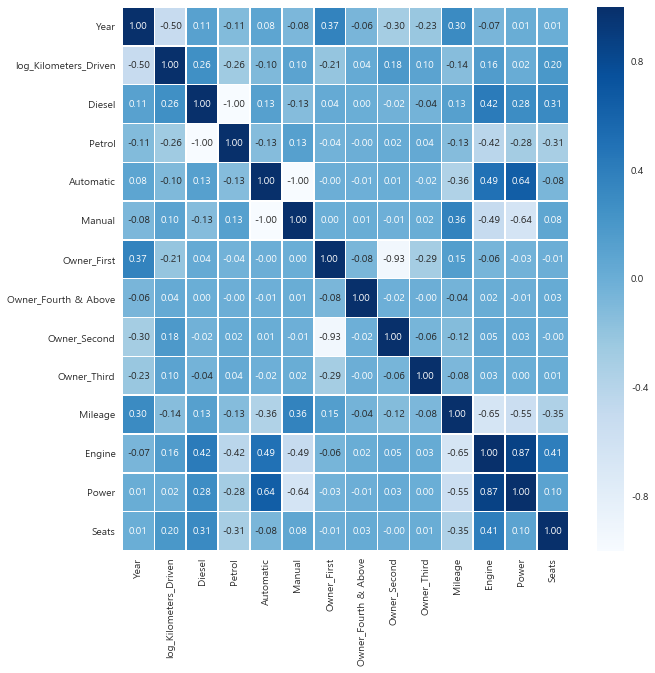

In [70]:
# Heatmap
plt.figure(figsize=(10,10))

ax = sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidth=.5, cmap='Blues')
b, t = ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.show()

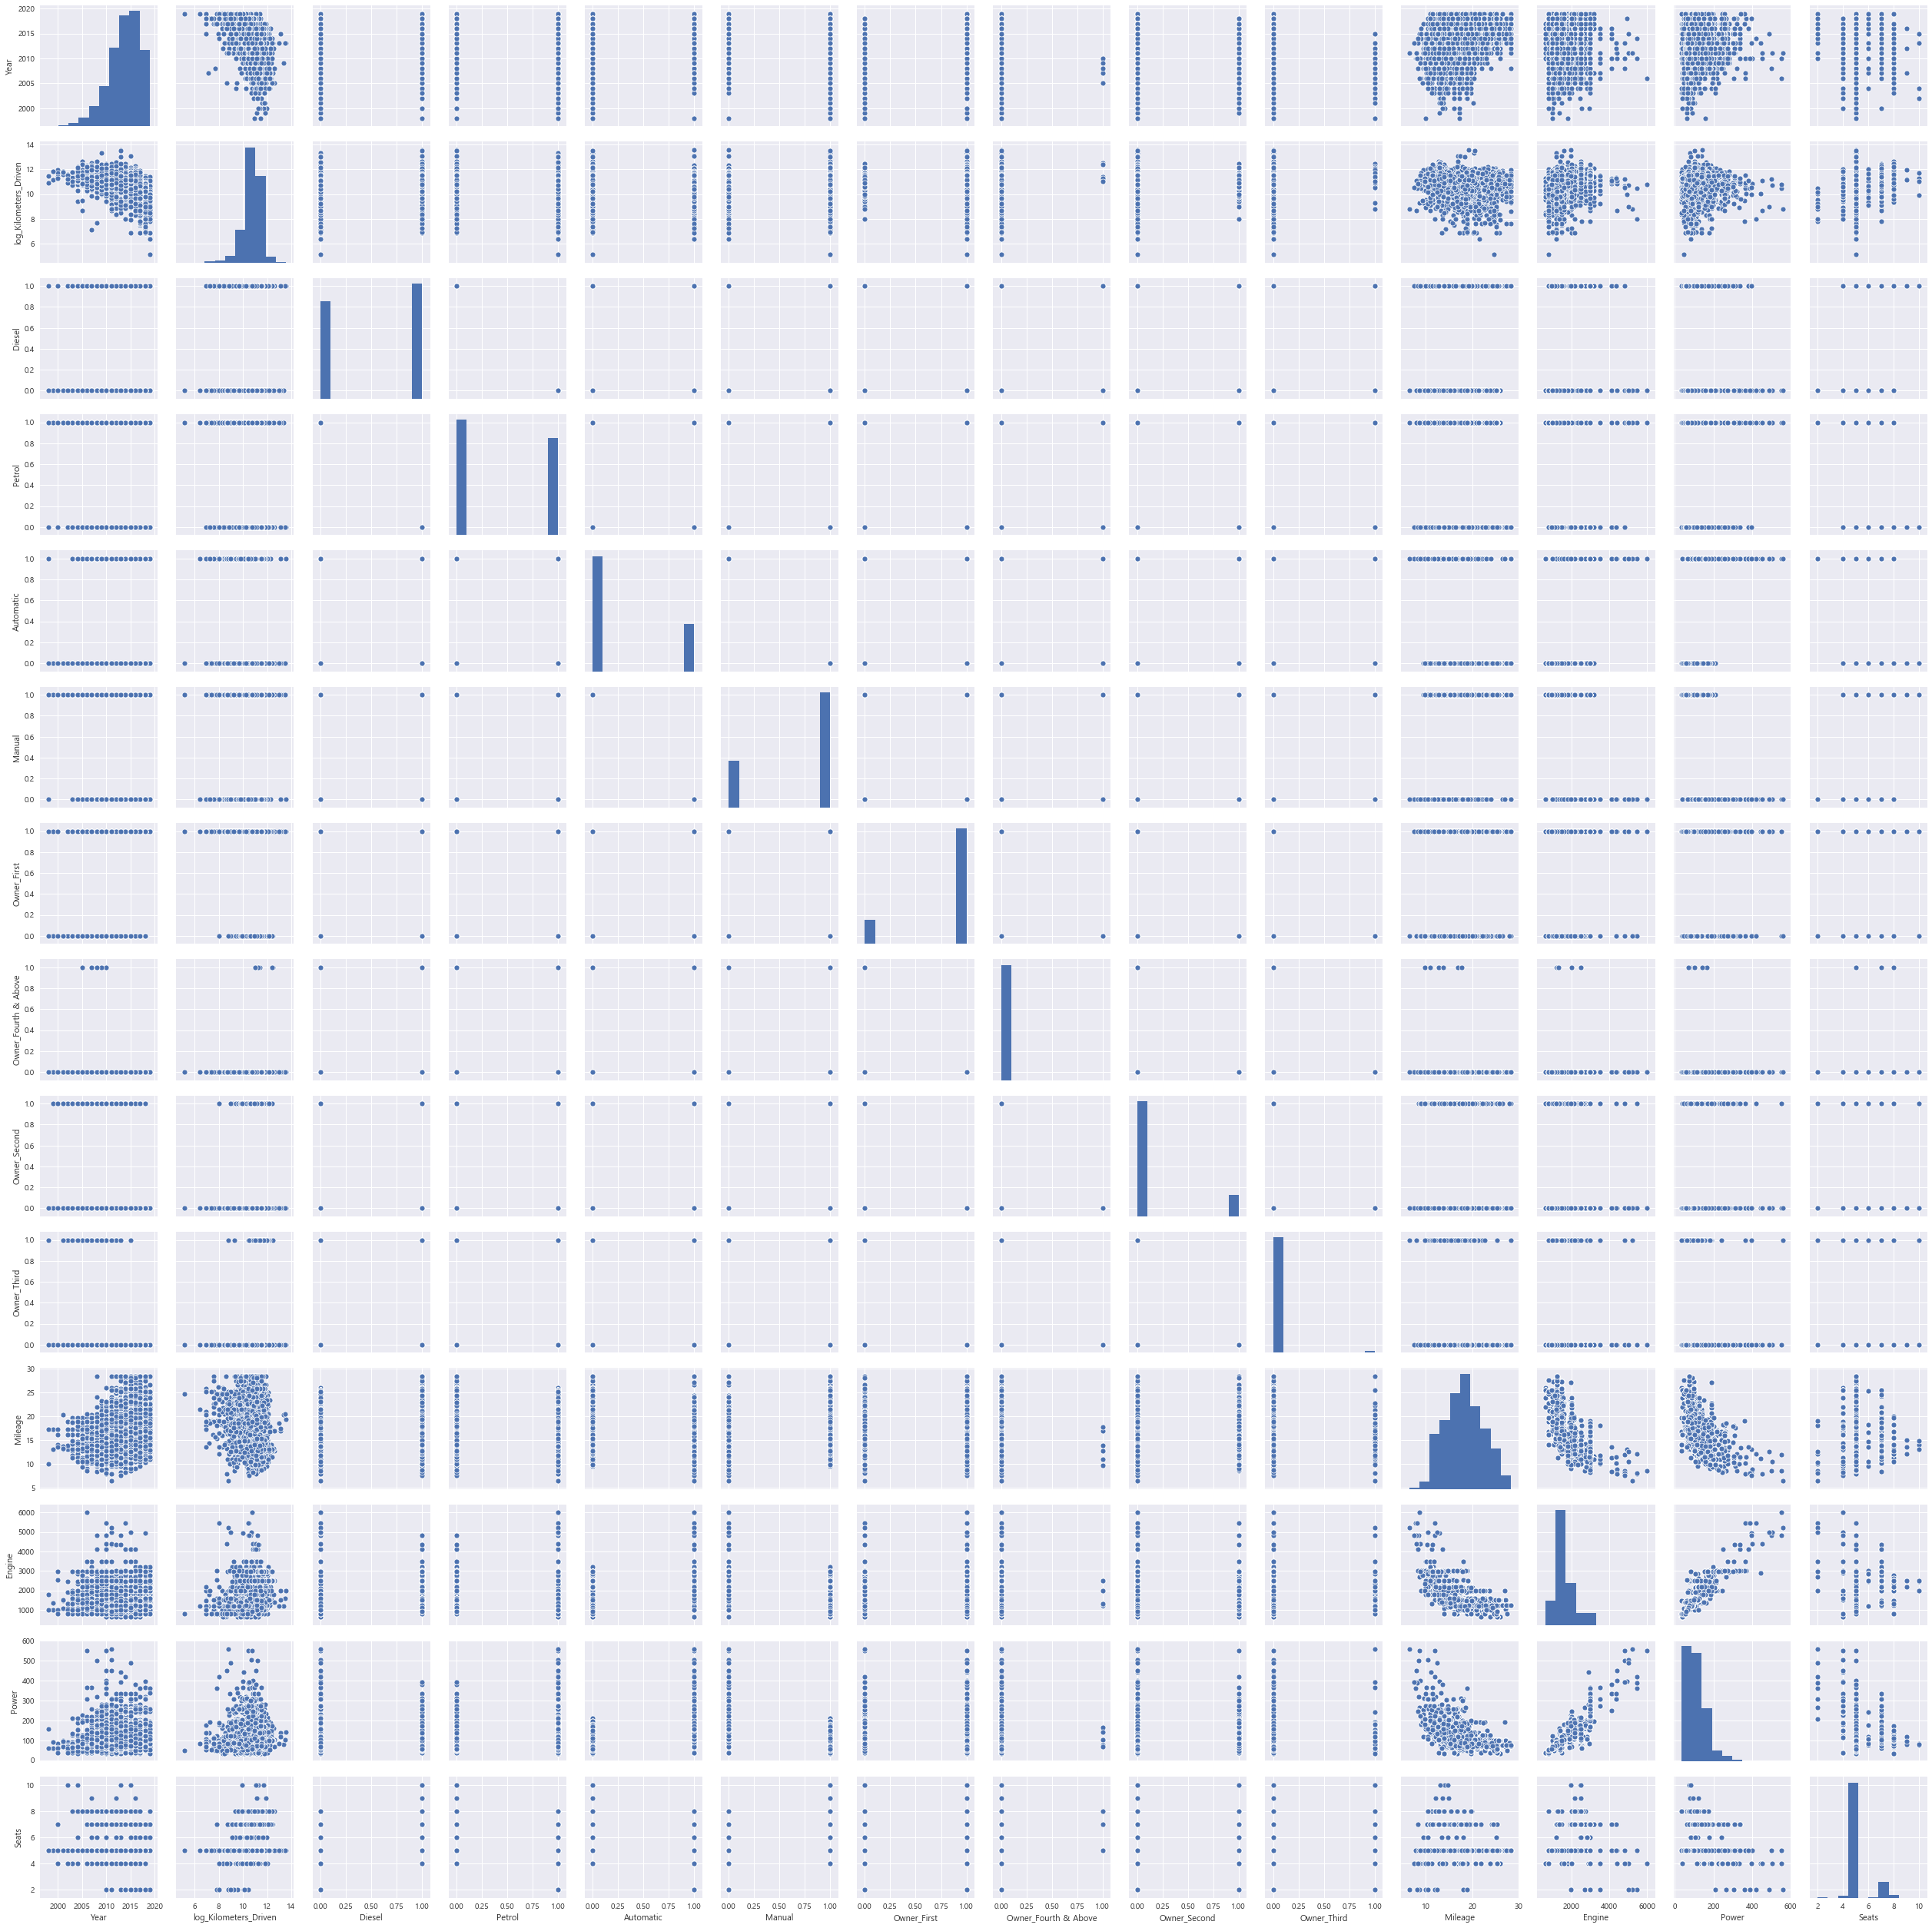

In [71]:
sns.pairplot(X)

- `Mileage`와 `Power`, `Mileage`와 `Engine`, `Engine`과 `Power` 간의 선형관계가 보입니다.

##### 다중공선성 확인

다중공선성을 확인하고 VIF가 10 이상인 변수는 제거해줍니다. 

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
X1 = X.iloc[:,2:]

In [74]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['feature'] = X1.columns
vif.sort_values('VIF Factor', ascending=False)

C:\Users\jhr50\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,feature
2,inf,Diesel
3,inf,Petrol
4,inf,Automatic
5,inf,Manual
6,inf,Owner_First
7,inf,Owner_Fourth & Above
8,inf,Owner_Second
9,inf,Owner_Third
11,9.258931,Engine
12,6.949200,Power


In [75]:
X2 = X1.drop('Diesel', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['feature'] = X2.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
3,inf,Automatic
4,inf,Manual
5,inf,Owner_First
6,inf,Owner_Fourth & Above
7,inf,Owner_Second
8,inf,Owner_Third
10,9.258931,Engine
11,6.949200,Power
9,3.340284,Mileage
2,2.264673,Petrol


In [76]:
X3 = X2.drop('Automatic', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['feature'] = X3.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
4,611997.505382,Owner_First
6,116207.870425,Owner_Second
7,12926.735882,Owner_Third
5,897.142243,Owner_Fourth & Above
9,9.258931,Engine
10,6.949200,Power
8,3.340284,Mileage
2,2.264673,Petrol
11,1.972281,Seats
3,1.844399,Manual


In [77]:
X4 = X3.drop('Owner_First', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['feature'] = X4.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
0,621.062928,Year
1,274.973979,log_Kilometers_Driven
10,82.461014,Seats
8,77.501340,Engine
7,65.428294,Mileage
9,37.536198,Power
3,6.289585,Manual
2,4.149102,Petrol
5,1.259856,Owner_Second
6,1.046867,Owner_Third


In [78]:
X5 = X4.drop('Year', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['feature'] = X5.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
0,121.309325,log_Kilometers_Driven
7,75.952739,Engine
9,66.170204,Seats
8,35.958109,Power
6,33.490796,Mileage
2,6.264053,Manual
1,2.493756,Petrol
4,1.256025,Owner_Second
5,1.044738,Owner_Third
3,1.006105,Owner_Fourth & Above


In [79]:
X6 = X5.drop('log_Kilometers_Driven', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['feature'] = X6.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
6,71.765709,Engine
8,51.064978,Seats
7,35.794986,Power
5,16.608714,Mileage
1,6.161269,Manual
0,2.098237,Petrol
3,1.198602,Owner_Second
4,1.030962,Owner_Third
2,1.004391,Owner_Fourth & Above


In [80]:
X7 = X6.drop('Engine', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['feature'] = X7.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
7,24.275750,Seats
5,13.091095,Mileage
6,8.213157,Power
1,6.066182,Manual
0,1.772533,Petrol
3,1.195990,Owner_Second
4,1.028698,Owner_Third
2,1.004164,Owner_Fourth & Above


In [81]:
X8 = X7.drop('Seats', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['feature'] = X8.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,feature
5,9.465508,Mileage
1,4.823292,Manual
6,3.869276,Power
0,1.762372,Petrol
3,1.190942,Owner_Second
4,1.026739,Owner_Third
2,1.002387,Owner_Fourth & Above


- `Year`, `log_Kilometers_Driven`, `Engine`, `Seats`, 그리고 각 더미변수 범주에서 하나씩 제거해야 다중공선성을 해결할 수 있었습니다. 

### 5. log_Price 변수와의 상관관계

In [82]:
data.corr()['log_Price'].sort_values(ascending=False)

log_Price                1.000000
Power                    0.769235
Engine                   0.685794
Automatic                0.613851
Year                     0.487057
Diesel                   0.423868
Owner_First              0.172412
Seats                    0.167352
Owner_Fourth & Above    -0.026048
Owner_Third             -0.123932
Owner_Second            -0.133207
log_Kilometers_Driven   -0.194772
Mileage                 -0.308700
Petrol                  -0.423868
Manual                  -0.613851
Name: log_Price, dtype: float64

## Modeling

### 1. sklearn LinearRegression

In [83]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [84]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X8, y, test_size=0.2, random_state=0)

In [85]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# predict
pred = model.predict(X_train)

In [87]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.7089692763003952

In [88]:
mean_squared_error(y_train, pred)

0.2156185078459948

In [89]:
print(model.coef_)
print(model.intercept_)

[-0.36883095 -0.40397688 -0.62622586 -0.37474381 -0.86212519  0.00800318
  0.00960089]
1.1435442660125683


In [90]:
# test data R-squred
model.score(X_test, y_test)

0.6935710089530043

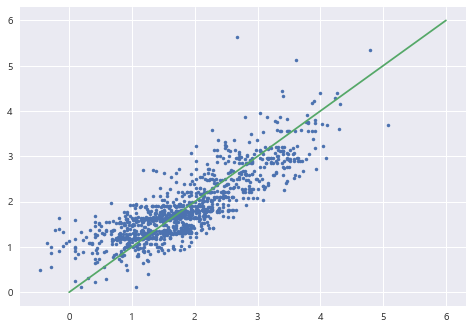

In [91]:
# 예측 vs. 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

x = np.linspace(0, 6)
y = x
plt.plot(x,y)
plt.show()

### Ridge, Lasso Reression

In [92]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [93]:
# R-square
ridge.score(X_train, y_train)

0.7089518745308794

In [94]:
# Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5996463009537156

### 2. statsmodels OLS

In [95]:
import statsmodels.api as sm

In [96]:
X8.columns

Index(['Petrol', 'Manual', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third', 'Mileage', 'Power'],
      dtype='object')

In [97]:
y = data['log_Price']

In [98]:
model = sm.OLS(y, X8)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_Price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          1.398e+04
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        02:00:29   Log-Likelihood:                         -3974.4
No. Observations:                5778   AIC:                                      7963.
Df Residuals:                    5771   BIC:                                      8009.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

- 각 변수의 p값이 대체적으로 0.05보다 작거나 그에 가까우므로 유의미한 변수라고 볼 수 있습니다. 
- Durbin-Watson 값이 2에 가까우므로 잔차의 독립성 가정 만족함을 알 수 있습니다. 

## 회귀분석 가정 검토

In [99]:
import scipy.stats

In [100]:
# 모델을 통해 얻은 예측값
pred = result.predict()

In [101]:
# 잔차 = 실제값 - 예측값
residual = data['log_Price'] - pred

In [102]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

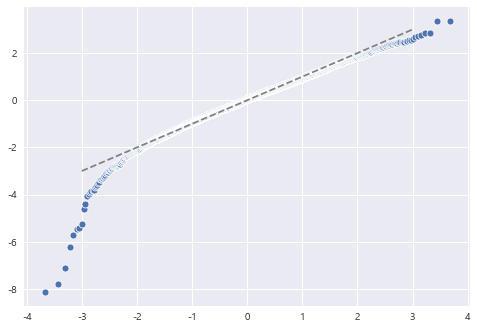

In [103]:
# 잔차의 정규성
sns.scatterplot(x, y)
plt.plot([-3,3], [-3,3], '--', color='grey')

- 직선의 형태를 따라가고 있으므로 잔차의 정규성 만족하는 것으로 보입니다.

**멘토링 Q&A**

- Question1: 중고가 가격에 `kilometers_driven`이나 `engine`의 경우 중요한 변수일 것 같은데 제거해도 괜찮은건가? <br>
A. 다중공선성이 발생했다는 것 자체가 다른 변수와 상관성이 높다는 의미이므로 상관성이 높은 변수를 통해 설명이 가능함. <br>
cf.) VIF 기준을 현재 10으로 선정했지만 이는 사용자의 관점에 따라 변경 가능함. 
<br><br>
- Question2: 각 더미변수 범주에서 하나씩 제거될 경우, 이후 모델 결과 해석할 때 어떤 영향을 미치는지 <br>
A. 회귀계수를 설명할 때 `Transmission`의 경우 Automatic 대비 Manual의 회귀계수로 해석됨. 